In [1]:
import pathlib
import pickle
import sys

In [2]:
sys.path.append(str(pathlib.Path('../').resolve()))

In [3]:
from lib.utils.data import load_integer_dataset
from lib.utils.enums import Dataset
from lib.utils.nn import accuracy

## Model

In [4]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [5]:
print(model)

IntegerLocalLossCNN(
	(0): Sequential(
			(0): LocalConv2dBlock(
			(0): IntegerConv2d(in_channels=1, out_channels=128, bias=False, decay_rate_inv=28000)
			(1): ConstantScaling(fwd_factor=2304, bwd_factor=1)
			(2): NitroLeakyReLU(negative_slope_inv=4)
			(learning_layers): Sequential(
			(0): MaxPool2d(kernel_size=(8, 4), stride=(8, 4), padding=(4, 0))
			(1): Flatten()
			(2): IntegerLinear(in_features=3584, out_features=10, bias=False, decay_rate_inv=3500)
			(3): ConstantScaling(fwd_factor=917504, bwd_factor=1)
		)
	)
			(1): LocalConv2dBlock(
			(0): IntegerConv2d(in_channels=128, out_channels=256, bias=False, decay_rate_inv=28000)
			(1): ConstantScaling(fwd_factor=294912, bwd_factor=1)
			(2): NitroLeakyReLU(negative_slope_inv=4)
			(learning_layers): Sequential(
			(0): MaxPool2d(kernel_size=(8, 8), stride=(8, 8), padding=(4, 4))
			(1): Flatten()
			(2): IntegerLinear(in_features=4096, out_features=10, bias=False, decay_rate_inv=3500)
			(3): ConstantScaling(fwd_factor=104857

## Data

In [6]:
config = dict(
    dataset=Dataset.FASHION_MNIST.name,
    subsample_ratio=1.0,
    ohe_values=(0, 32),
    data_augmentation=True,
    normalize=True,
    device='cuda'
)

Training on 60000 samples
Data normalized. New statistics:
-  Min: -45
-  Max: 114
- Mean: 0
-  Std: 56

Moved data to device: <CUDA Device 0>
Train set:  (60000, 1, 28, 28), (60000, 10)
Test set:   (10000, 1, 28, 28), (10000, 10)
Data types: (int8, int8)


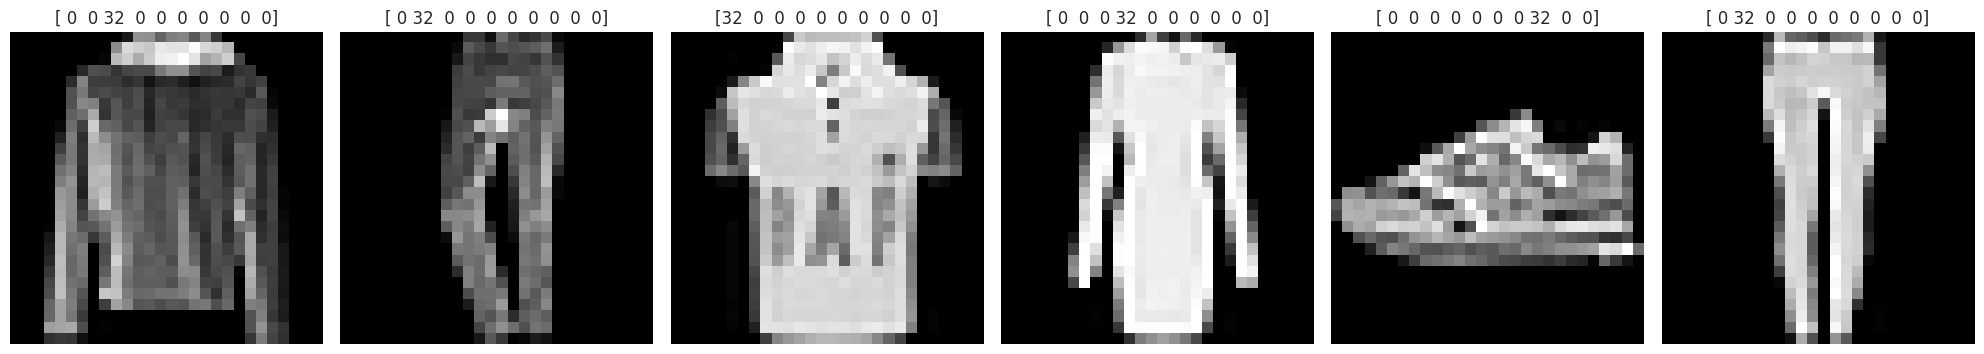

In [7]:
dataset = load_integer_dataset(config, ohe_values=config["ohe_values"], val_dim=0, show_images=True)
X_train, _, X_test, y_train, _, y_test = dataset

## Evaluation

In [8]:
y_pred_train = model.predict(X_train, progress_bar=True)
y_pred_test = model.predict(X_test, progress_bar=True)

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

In [9]:
print(f"Output accuracy:")
print(f"- Train accuracy: {accuracy(y_train, y_pred_train):.2%}")
print(f"-  Test accuracy: {accuracy(y_test, y_pred_test):.2%}")

Output accuracy:
- Train accuracy: 95.04%
-  Test accuracy: 93.19%


In [10]:
y_subnets = model.subnetworks_predict(X_train, progress_bar=True)
for i, y_subnet in enumerate(y_subnets):
    subnet_acc = accuracy(y_train, y_subnet)
    print(f'Local train accuracy {i}: {subnet_acc:.2%}')

  0%|          | 0/469 [00:00<?, ?it/s]

Local train accuracy 0: 88.63%
Local train accuracy 1: 94.01%
Local train accuracy 2: 95.69%
Local train accuracy 3: 95.54%
Local train accuracy 4: 95.76%
Local train accuracy 5: 95.59%
Local train accuracy 6: 95.13%


In [11]:
y_subnets = model.subnetworks_predict(X_test, progress_bar=True)
for i, y_subnet in enumerate(y_subnets):
    subnet_acc = accuracy(y_test, y_subnet)
    print(f'Local test accuracy {i}: {subnet_acc:.2%}')

  0%|          | 0/79 [00:00<?, ?it/s]

Local test accuracy 0: 87.94%
Local test accuracy 1: 91.47%
Local test accuracy 2: 92.89%
Local test accuracy 3: 93.34%
Local test accuracy 4: 93.62%
Local test accuracy 5: 93.64%
Local test accuracy 6: 93.30%
